**THE LANGUAGE OF PROTEINS** FourthBrain 

INSTADEEP Industry Capstone
Team: **Jonathan Grant, Anjana Sengupta, Sam Deo, Shaista Hussain**

**Introduction**

From a chemical point of view, proteins are some of the most structurally complex and functionally sophisticated molecules known. The structure and chemistry of each protein has been developed over billions of years of evolutionary history. 

In this project, we examine three kinds of proteins in three datasets: [1] anti-cancer proteins (ACPs), [2] anti-microbial proteins (AMPs), and [3] DNA-Binding proteins(DNABPs). 

Each dataset contains only two columns – the protein sequence and label, therefore, we don’t have many columns (features) on which to do our exploratory data analysis (EDA). Instead, we focus on understanding the amino acids in the proteins. 


In [ ]:
#stdlib
import os
import sys
import math
import datetime as dt
import functools
import itertools
import collections
import subprocess

# 3rd party
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import missingno as msno

# Config
pd.set_option('display.max_columns', None)

# ACP Data (Anti Cancer Proteins)

**ACP**
We will not do EDA on the TEST or the TEST + TRAIN dataset, but only on the TRAIN dataset. The TRAIN dataset is labeled and is divided into two sets of equal numbers of ACP and non-ACP proteins. It’s a limited dataset, with 1378 rows and two columns: 

**Column 1:** A protein sequence represented by alphabets that represent the 20 or so amino acids

**Column 2:** ACP/non-ACP Label – a binary 0/1 value.


## Load your data below:
Data must have 'sequence' column of uppercase letters and 'label' column (int). 
`name` is a variable corresponding to what your label does.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/acp/train_data.csv').rename(columns={'sequences': 'sequence'})
name = 'ACP'

Basic statistical descriptions

In [ ]:
df.describe()

,label
count,1378.000000
mean,0.500000
std,0.500182
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


The overall count is 1378. The min is 0 and max is 1.

These are real CSVs, not fasta, unlike most protein data.

In [ ]:
df['label'].value_counts()

0    689
1    689
Name: label, dtype: int64

In [ ]:
df.head(5)

,sequence,label
0,RRWWRRWRRW,0
1,GWKSVFRKAKKVGKTVGGLALDHYLG,0
2,ALWKTMLKKLGTMALHAGKAALGAAADTISQGTQ,1
3,GLFDVIKKVAAVIGGL,1
4,VAKLLAKLAKKVL,1


In [ ]:
df.tail(5)

,sequence,label
1373,LLKLLKWLLKLLK,0
1374,GFKDWIKGAAKKLIKTVAANIANQ,0
1375,ESEFDRQEYEECKRQCMQLETSGQMRRCVSQCDKRFEEDIDWSKYDNQE,0
1376,FISAIASFLGKFL,1
1377,RLSRIVVIRVCR,0


**Proteins**
At the top and bottom of the file: We examined the header and tail of the file to get a quick view of the protein sequence and labels. 


In [ ]:
df['sequence_len'] = df['sequence'].str.len()
print(df.sequence_len)

0       10
1       26
2       34
3       16
4       13
        ..
1373    13
1374    24
1375    49
1376    13
1377    12
Name: sequence_len, Length: 1378, dtype: int64


We begin the character and sequence description per protein


**Count Unique Characters per protein**

> Indented block



We started our exploratory data analysis by examining the amino acids in the proteins. There are at least 20 types of amino acids (and by some measure, more - 24 or 26) each with different chemical properties. The protein molecules are made up of long chains of amino acids, where each amino acid is linked to its neighbor through covalent peptide bonds. The shape of the proteins is specified by the amino acids.

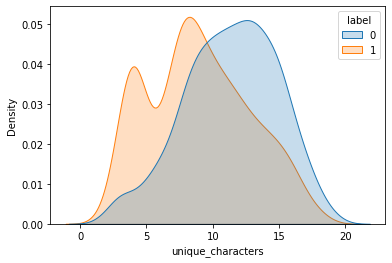

In [ ]:
df['unique_characters'] = df['sequence'].apply(lambda x: len(np.unique([*x])))
sns.kdeplot(data=df, x='unique_characters', hue='label', common_norm=True, shade=True)

In [ ]:
df['unique_characters'] = df['sequence'].apply(lambda x: len(np.unique([*x])))
df.describe()

,label,sequence_len,unique_characters
count,1378.000000,1378.000000,1378.000000
mean,0.500000,23.826560,10.148041
std,0.500182,11.061246,3.849926
min,0.000000,3.000000,2.000000
25%,0.000000,15.000000,8.000000
50%,0.500000,22.000000,10.000000
75%,1.000000,31.000000,13.000000
max,1.000000,50.000000,19.000000


In [ ]:
df.head(25)

,sequence,label,sequence_len,unique_characters
0,RRWWRRWRRW,0,10,2
1,GWKSVFRKAKKVGKTVGGLALDHYLG,0,26,13
2,ALWKTMLKKLGTMALHAGKAALGAAADTISQGTQ,1,34,12
3,GLFDVIKKVAAVIGGL,1,16,8
4,VAKLLAKLAKKVL,1,13,4
5,IIGHLIKTALGFLGL,0,15,8
6,FLPLLASLFSRLL,1,13,6
7,WFKKIPKFLHLAKKF,1,15,8
8,ATCDLLSKWNWNHTACAGHCIAKGFKGGYCNDKAVCVCRN,1,40,16
9,NIPQLTPTP,0,9,6


To understand the distribution of the amino acids *in* each protein, we counted the unique amino acids in a protein. Although the length of the sequence of a protein varied from a minimum of 3 to a maximum of 50 in this dataset, the number of *unique* amino acids in them varied from 2 – 19, which means these proteins can be made up of repeating sequences of as few as two amino acids - for example, RRWWRRWRRW.

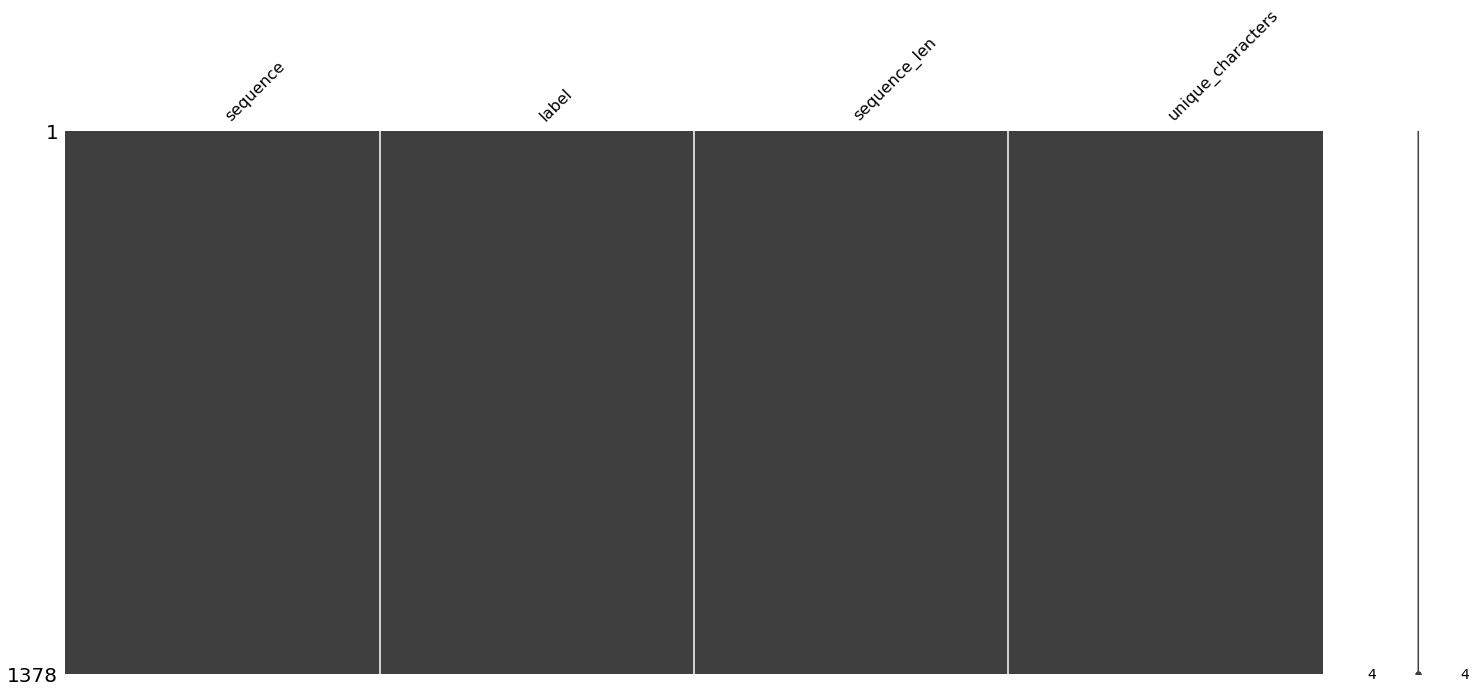

In [ ]:
msno.matrix(df) 

In [ ]:
all_chars = sorted(set(df[['sequence']].applymap(list).sequence.apply(pd.Series).stack().unique()))
f'There are {len(all_chars)} unique amino acid characters in data.'

'There are 20 unique amino acid characters in data.'

There are 20 unique amino acid characters in data.

## Count length of sequence per protein
We also add log sequence length in case the distribution is lognormal.

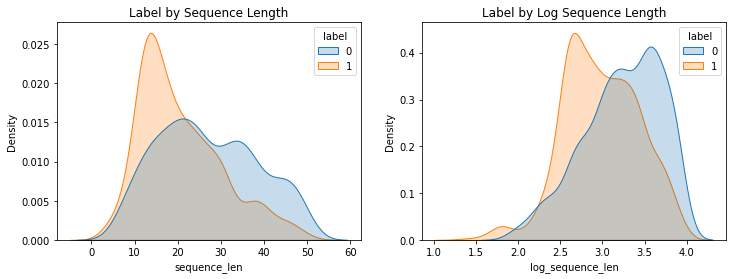

In [ ]:
_fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['sequence_len'] = df['sequence'].str.len()
df['log_sequence_len'] = np.log(1 + df['sequence_len'])
sns.kdeplot(data=df, x='sequence_len', hue='label', shade=True, ax=axes[0]).set_title('Label by Sequence Length')
sns.kdeplot(data=df, x='log_sequence_len', hue='label', shade=True, ax=axes[1]).set_title('Label by Log Sequence Length')
pass

As mentioned before, for this dataset, we only have two columns - sequence of amino acids and its label (ACP/non ACP). The density of the length of the proteins in the two groups is shown in the plot above.

This plot hints at a minor difference between the two labeled groups. The non-ACP protein  (label = 0) is made up of longer sequences of proteins than the ACP proteins (label = 1) as is visible in the plot. While the ACP proteins (label = 1) peaks around a sequence length of 10, the non-ACP proteins (label = 0) are more spread out (these proteins in general have longer sequence lengths than the other group) and have less of a peak. This was an interesting difference and we followed it up. 

We asked if protein length was important and significant to its function as a part of our exploratory data analysis. The question we posed was: were longer proteins different than shorter proteins in terms of their function?

It turns out that there *is* a relationship between protein conservation and protein length. Conserved (slowly evolving) proteins are longer in length than non-Conserved (rapidly evolving) proteins. In fact, there is a significant evolutionary trend favoring shorter proteins in the absence of other constraints. According to biologists, the less important a protein is, the smaller it is, and the more important a protein is, the longer it is. We do not have expert domain area knowledge, therefore we merely make note of this fact for later follow-up.


## Amino acid count
Again, this is may be a lognormal distribution so we show the logs as well.

In [ ]:
all_chars = sorted(set(df[['sequence']].applymap(list).sequence.apply(pd.Series).stack().unique()))
f'There are {len(all_chars)} unique amino acid characters in data.'

'There are 20 unique amino acid characters in data.'

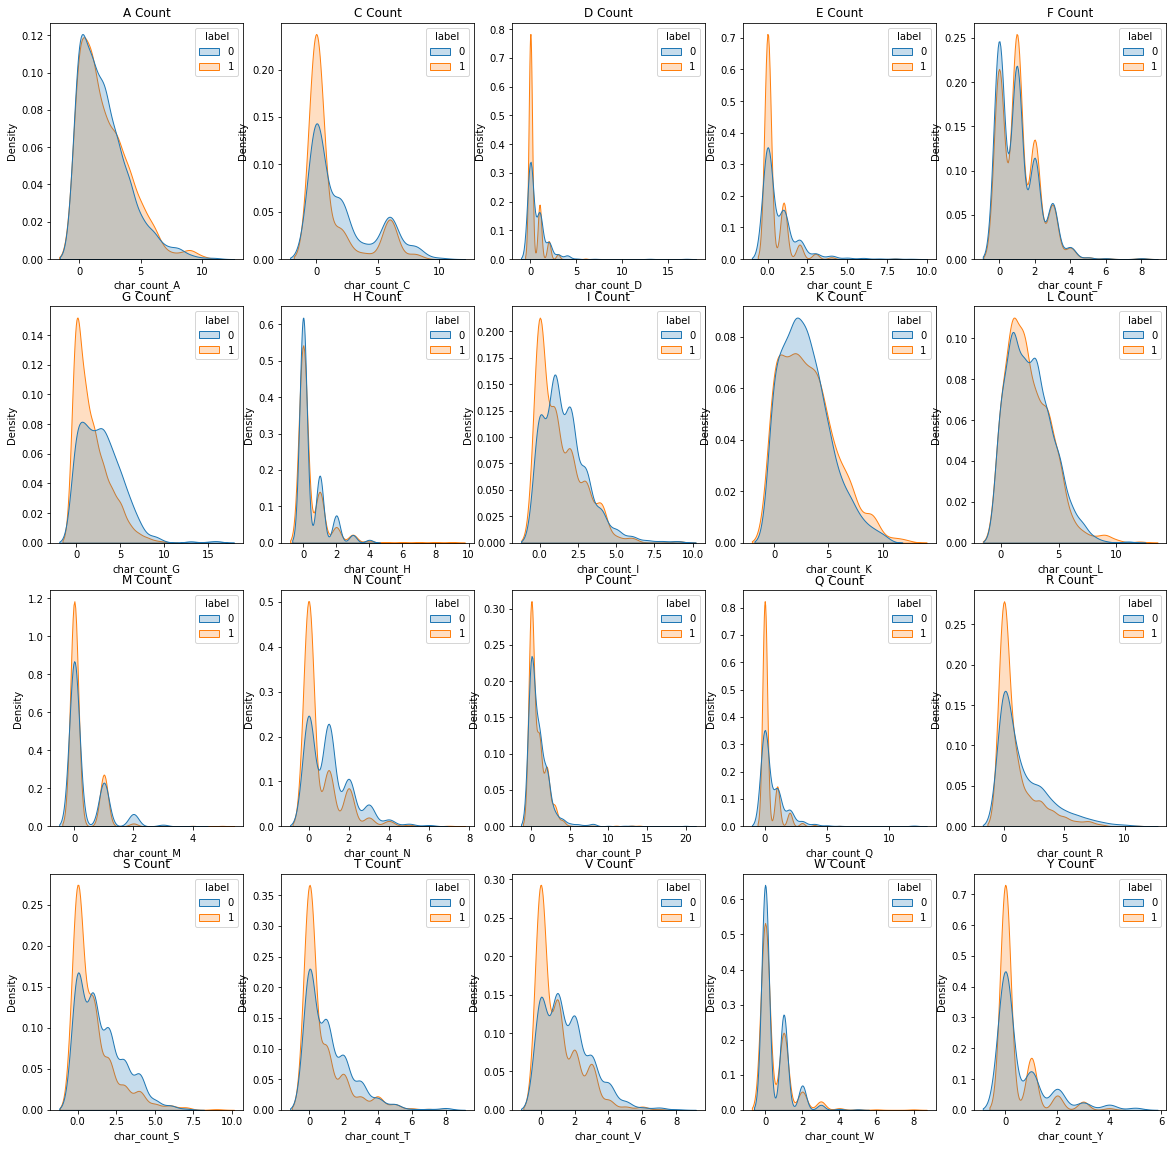

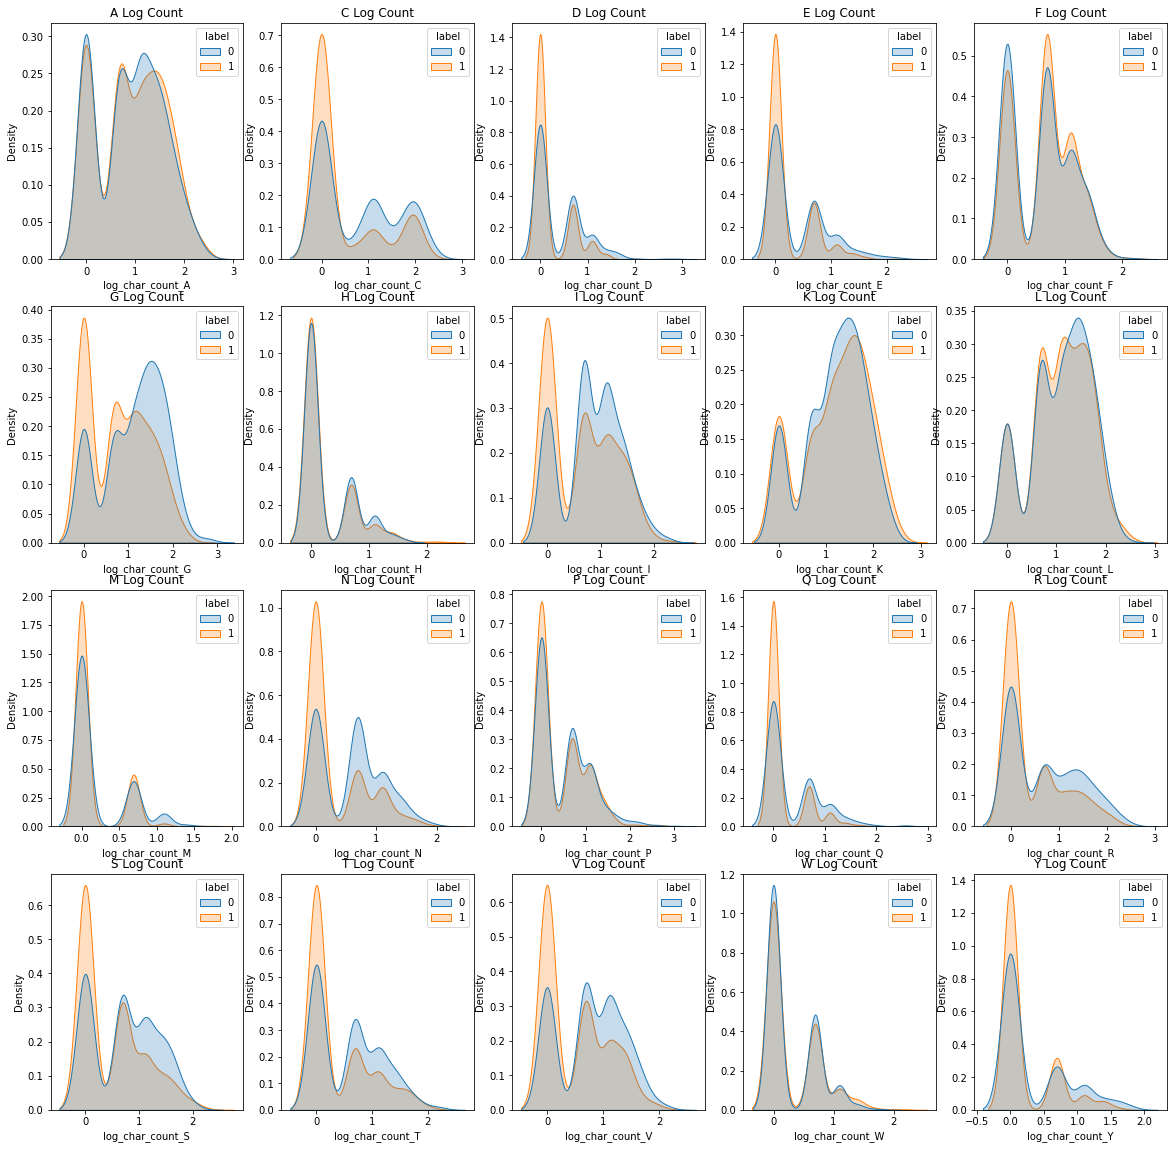

In [ ]:
for char in sorted(all_chars):
    df[f'char_count_{char}'] = df['sequence'].str.count(char)
    df[f'log_char_count_{char}'] = np.log(1 + df[f'char_count_{char}'])
fig, axs = plt.subplots(math.ceil(len(all_chars) / 5), 5, figsize=(20, max(20, len(all_chars))))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(all_chars):
    sns.kdeplot(data=df, x=f'char_count_{char}', hue='label', warn_singular=False, shade=True, ax=axs[i]).set_title(f'{char} Count')
plt.show()
fig, axs = plt.subplots(math.ceil(len(all_chars) / 5), 5, figsize=(20, max(20, len(all_chars))))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(all_chars):
    sns.kdeplot(data=df, x=f'log_char_count_{char}', hue='label', warn_singular=False, shade=True, ax=axs[i]).set_title(f'{char} Log Count')
pass

In [ ]:
def plot_seq_count(df, data_name):
  sns.distplot(df['seq_char_count'].values)
  plt.title(f'Sequence char count: {data_name}')
  plt.grid(True)

In [ ]:
plt.subplot(1, 3, 1)
plot_seq_count(df, 'Train')

plt.subplot(1, 3, 3)
plot_seq_count(df2, 'Test')

plt.subplots_adjust(right=3.0)
plt.show()

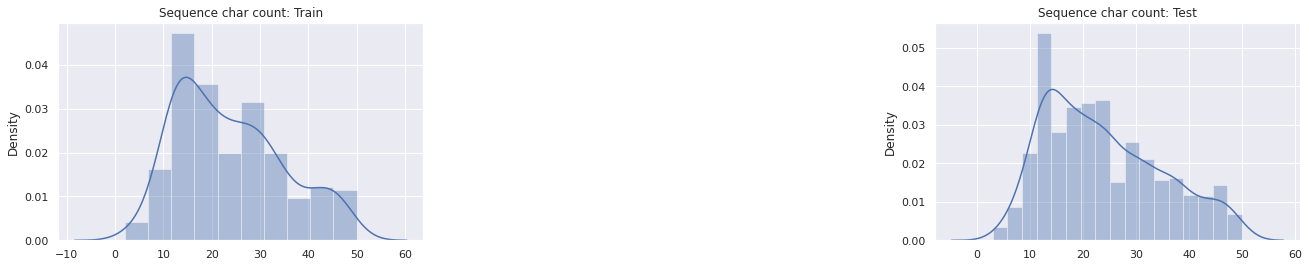

OBSERVATION Most of the unaligned amino acid

In [ ]:
# Length of sequence in test data.
df2['seq_char_count']= df2['sequences'].apply(lambda x: len(x))

In [ ]:
def plot_seq_count(df, data_name):
  sns.distplot(df['seq_char_count'].values)
  plt.title(f'Sequence char count: {data_name}')
  plt.grid(True)

In [ ]:
plt.subplot(1, 3, 1)
plot_seq_count(df, 'Train')

plt.subplot(1, 3, 3)
plot_seq_count(df2, 'Test')

plt.subplots_adjust(right=3.0)
plt.show()

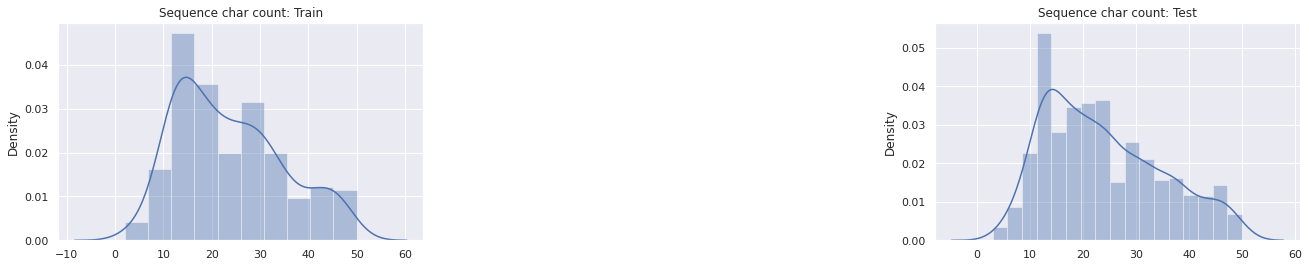

SEQUENCES fall between 10 and 50; similar in train and test set

SEQUENCE CODE FREQUENCIES

In [ ]:
def get_code_freq(df, train_data):
  
  df = df.apply(lambda x: " ".join(x))
  
  codes = []
  for i in df: # concatination of all codes
    codes.extend(i)

  codes_dict= Counter(codes)
  codes_dict.pop(' ') # removing white space
  print(f'Codes: Train Data')
  print(f'Total unique codes: {len(codes_dict.keys())}')
  df = pd.DataFrame({'Code': list(codes_dict.keys()), 'Freq': list(codes_dict.values())})
  return df.sort_values('Freq', ascending=False).reset_index()[['Code', 'Freq']]

def create_dict(codes):
  char_dict = {}
  for index, val in enumerate(codes):
    char_dict[val] = index+1
  return char_dict
char_dict = create_dict(codes)

print(char_dict)
print("Dict Length:", len(char_dict))



{'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}
Dict Length: 20

**Counter for code frequency analysis**

In [ ]:
pip install Counter
def get_code_freq(df, train_data):
  
  df = df.apply(lambda x: " ".join(x))
  
  codes = []
  for i in df: # concatination of all codes
    codes.extend(i)

  codes_dict= Counter(codes)
  codes_dict.pop(' ') # removing white space
  print(f'Codes: Train Data')
  print(f'Total unique codes: {len(codes_dict.keys())}')
  df = pd.DataFrame({'Code': list(codes_dict.keys()), 'Freq': list(codes_dict.values())})
  return df.sort_values('Freq', ascending=False).reset_index()[['Code', 'Freq']]

def create_dict(codes):
  char_dict = {}
  for index, val in enumerate(codes):
    char_dict[val] = index+1
  return char_dict
char_dict = create_dict(codes)

print(char_dict)
print("Dict Length:", len(char_dict))

In [ ]:
# import counter class from collections module
from collections import Counter
codes_dict = Counter("codes")

In [ ]:
# test code sequence
test_code_freq = get_code_freq(df2['sequences'], 'Test')
test_code_freq

Codes: Train Data
Total unique codes: 20
Code	Freq
0	K	4141
1	L	3397
2	G	3153
3	A	2825
4	C	2251
5	I	2029
6	R	1810
7	V	1739
8	S	1699
9	F	1535
10	T	1309
11	P	1236
12	N	1119
13	E	759
14	D	731
15	Y	693
16	Q	690
17	W	688
18	H	646
19	M	383

In [ ]:
def plot_code_freq(df, data_name):
  
  plt.title(f'Code frequency: {data_name}')
  sns.barplot(x='Code', y='Freq', data=df)

In [ ]:
plt.subplot(1, 3, 1)
plot_code_freq(train_code_freq, 'Train')

plt.subplot(1, 3, 3)
plot_code_freq(test_code_freq, 'Test')

plt.subplots_adjust(right=3.0)
plt.show()

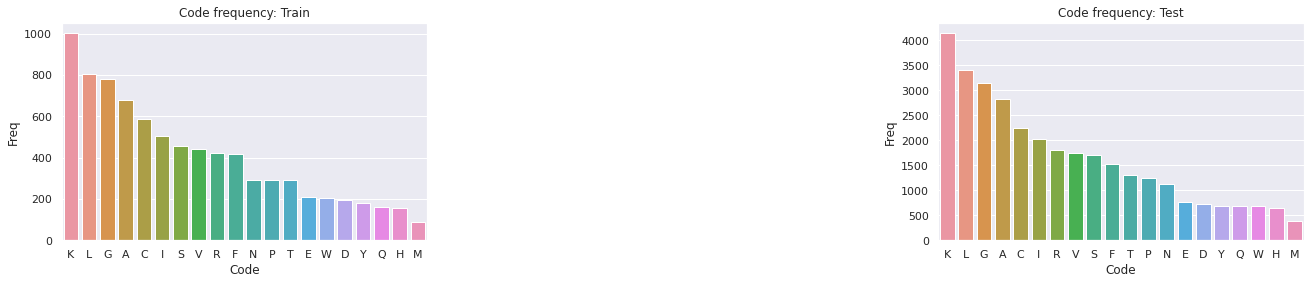

OBSERVED: Most frequent amino acid codes in order of most frequent: K , then L, G, A, C in the training set and the test set. Uncommon amino acids: Training (D,Y,Q,H,M) and Test (Y,Q,W,H,M).

Amino Acid Count:

In the following set of plots, we examine the density of the counts and if there are any differences by the two labeled groups ACP and non-ACP. In the following plots, the C count, D count, E count show differences, as do G count, I count, and few others. The plots are repeated using Log counts (taking logs makes the distribution better – it reduces extremes and reduces the effect of outliers). The distributions look better, but the conclusions are the same.


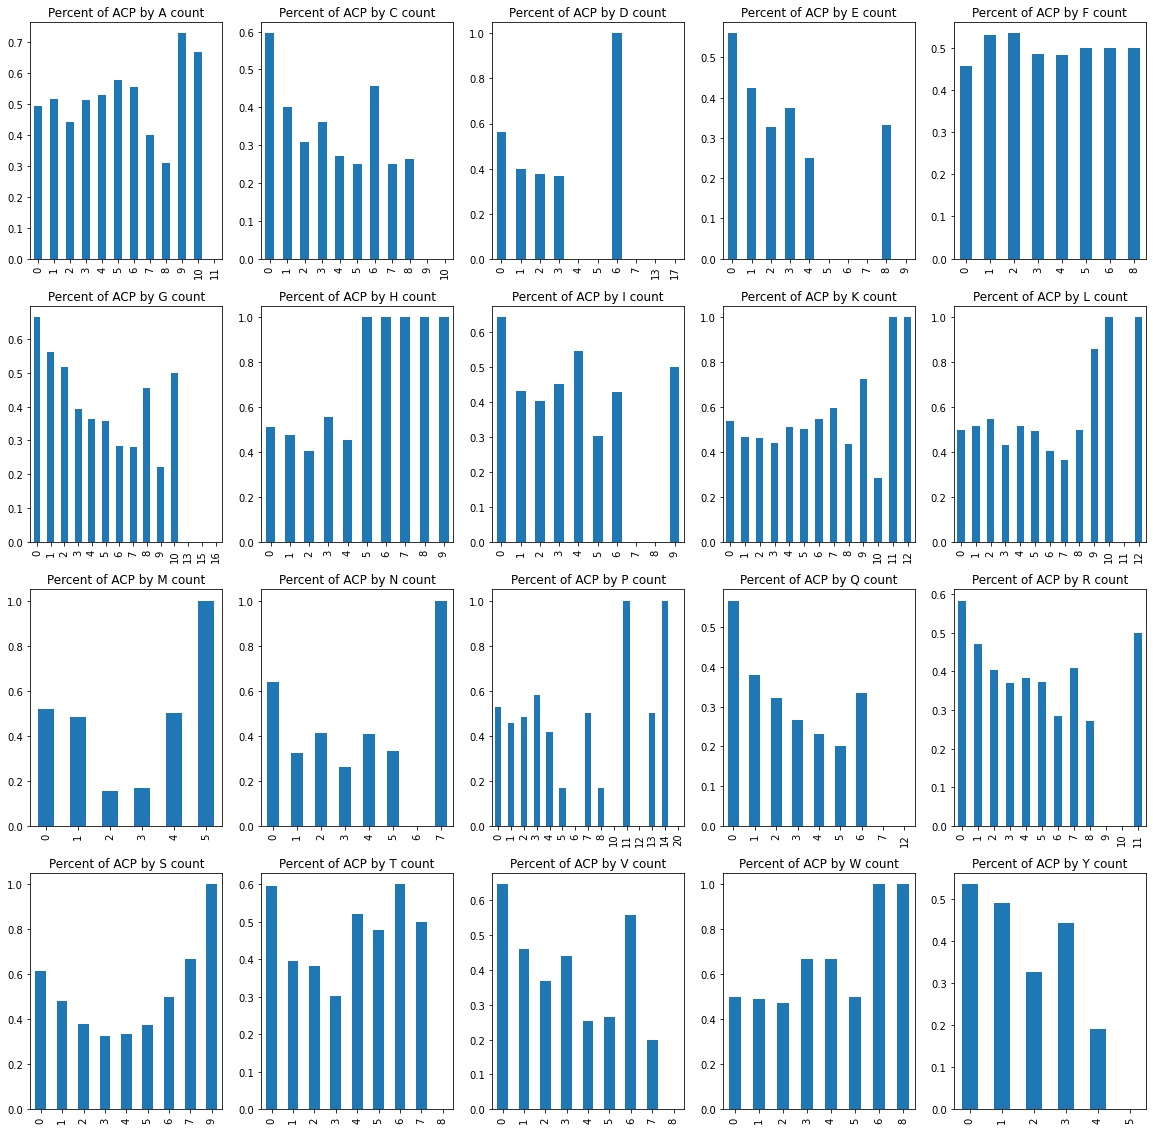

In [ ]:
# Percent of ACP by sequence length
fig, axs = plt.subplots(math.ceil(len(all_chars) / 5), 5, figsize=(20, max(20, len(all_chars))))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(sorted(all_chars)):
    df.groupby(f'char_count_{char}')['label'].mean().plot.bar(ax=axs[i], title=f'Percent of {name} by {char} count', xlabel='')

Percent of ACP by Sequence Length:

In this set of plots, we checked the occurrence of the ACP protein by amino acid to examine if any specific amino acid had progressively higher frequency of ACP with increasing presence. For example, in the first plot (Percent of ACP by A count), we see in the group where there are zero ‘A’ amino acids, only 0.5% are ACPs. In the group of proteins where there are ten ‘A’ amino acids, 0.7% are ACPs. Some plots show no difference in percentage of ACP (for example, the F count plot) but some do show a difference (H count, M count plots) or a trend (K count, L count, Q count, S count). It’s hard interpret these as it’s difficult to know whether individual amino acids are predictive. 

## Show the top and bottom most correlated columns

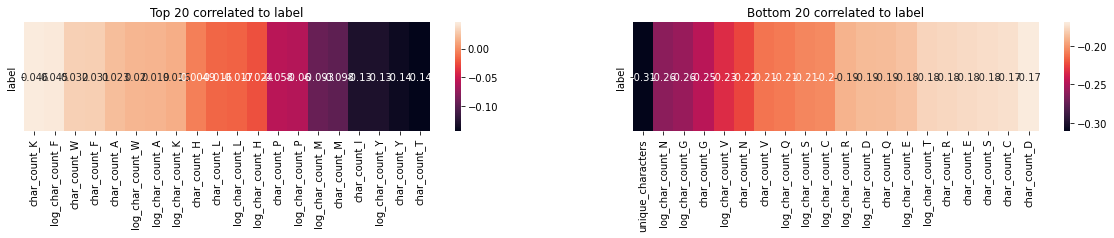

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 2))
max_columns = 20
corr_df = df.corr().loc[['label'], :]
top_corr_df = corr_df[list(reversed(corr_df.columns[corr_df.loc[corr_df.last_valid_index()].argsort()]))[1:max_columns+1]]
sns.heatmap(top_corr_df, annot=True, ax=ax[0]).set_title(f'Top {max_columns} correlated to label')
bot_corr_df = corr_df[list(corr_df.columns[corr_df.loc[corr_df.last_valid_index()].argsort()])[:max_columns]]
sns.heatmap(bot_corr_df, annot=True, ax=ax[1]).set_title(f'Bottom {max_columns} correlated to label')
pass

In [ ]:
df.describe()

,label,unique_characters,char_count_A,log_char_count_A,char_count_C,log_char_count_C,char_count_D,log_char_count_D,char_count_E,log_char_count_E,char_count_F,log_char_count_F,char_count_G,log_char_count_G,char_count_H,log_char_count_H,char_count_I,log_char_count_I,char_count_K,log_char_count_K,char_count_L,log_char_count_L,char_count_M,log_char_count_M,char_count_N,log_char_count_N,char_count_P,log_char_count_P,char_count_Q,log_char_count_Q,char_count_R,log_char_count_R,char_count_S,log_char_count_S,char_count_T,log_char_count_T,char_count_V,log_char_count_V,char_count_W,log_char_count_W,char_count_Y,log_char_count_Y,sequence_len
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,0.500000,10.148041,2.050073,0.901990,1.633527,0.608305,0.530479,0.300068,0.550798,0.304430,1.113933,0.618778,2.288099,0.957446,0.468795,0.267391,1.472424,0.734268,3.005080,1.187448,2.465167,1.078726,0.277939,0.177337,0.812046,0.448150,0.896952,0.458775,0.500726,0.274082,1.313498,0.572493,1.232946,0.615524,0.949927,0.483589,1.261974,0.645205,0.499274,0.300453,0.502903,0.279641,23.826560
std,0.500182,3.849926,2.001369,0.665666,2.457471,0.801284,1.030127,0.453167,1.033549,0.467834,1.104264,0.510723,2.227873,0.702187,0.895060,0.438484,1.483252,0.588382,2.366396,0.672679,1.904554,0.599602,0.569466,0.337423,1.090768,0.518026,1.508958,0.553382,1.048739,0.456213,1.944130,0.686784,1.464225,0.599839,1.353214,0.574602,1.373160,0.581610,0.810470,0.426497,0.932153,0.459231,11.061246
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.693147,1.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,0.500000,10.000000,2.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.693147,2.000000,1.098612,0.000000,0.000000,1.000000,0.693147,3.000000,1.386294,2.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,0.000000,22.000000
75%,1.000000,13.000000,3.000000,1.386294,2.000000,1.098612,1.000000,0.693147,1.000000,0.693147,2.000000,1.098612,4.000000,1.609438,1.000000,0.693147,2.000000,1.098612,4.000000,1.609438,4.000000,1.609438,0.000000,0.000000,1.000000,0.693147,1.000000,0.693147,1.000000,0.693147,2.000000,1.098612,2.000000,1.098612,2.000000,1.098612,2.000000,1.098612,1.000000,0.693147,1.000000,0.693147,31.000000
max,1.000000,19.000000,11.000000,2.484907,10.000000,2.397895,17.000000,2.890372,9.000000,2.302585,8.000000,2.197225,16.000000,2.833213,9.000000,2.302585,9.000000,2.302585,12.000000,2.564949,12.000000,2.564949,5.000000,1.791759,7.000000,2.079442,20.000000,3.044522,12.000000,2.564949,11.000000,2.484907,9.000000,2.302585,8.000000,2.197225,8.000000,2.197225,8.000000,2.197225,5.000000,1.791759,50.000000


In [ ]:
#calculate point-biserial correlation
stats.pointbiserialr(df.sequence_len, df.label)

PointbiserialrResult(correlation=-0.284244819672423, pvalue=5.0468768093928515e-27)

The point-biserial correlation between the protein sequence length(continuous) and ACP group (0/1) is negative and very significant, which implies the protein sequence length is negatively correlated with ACP. This implies, generally speaking, the ACP group (1) would tend to contain shorter protein sequences.

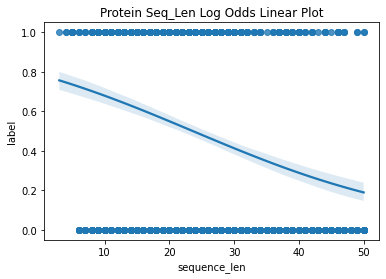

In [ ]:
SL = sns.regplot(x= 'sequence_len', y= 'label', data= df, logistic= True).set_title("Protein Seq_Len Log Odds Linear Plot")
SL.figure.savefig("Seq_Len log lin.png")

Because ultimately, this is going to be about classification and we're going to try the logistic regression model, we did a quick check on the assumption whether the continuous independent variable (protein sequence length) is linearly related to the log odds of the dependent variable (ACP 0/1). The above shows our assumption is okay.We have a negative correlation (as shown before) and very slightly S-shaped with flat-ish top and bottom, which is as it should be.

# AMP Data (Antimicrobial Proteins)

## Load your data below:
Data must have 'sequence' column of uppercase letters and 'label' column (int). 
`name` is a variable corresponding to what your label does.

The dataset is labeled and it is divided into two sets of equal numbers of AMP and non-AMP proteins. It’s a limited dataset, with no features except one, and it is moderate with 4042 rows and only two columns: 

Column 1: A protein sequence represented by alphabets of 21 amino acids

Column 2: AMP/non-AMP Label – a variable that takes on value 0 or 1.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/amp/all_data.csv').rename(columns={'SequenceID': 'sequence'}) # Replace me with the data you want
name = 'AMP'

In [ ]:
df.describe()

,label
count,4042.000000
mean,0.500000
std,0.500062
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


These are real CSVs, not fasta, unlike most protein data.

In [ ]:
df['label'].value_counts()

1    2021
0    2021
Name: label, dtype: int64

Examined the top few and bottom few records of the AMP dataset. What is immediately obvious is that the protein sequences are longer than in the ACP dataset. There is also a PDBs_code column (Protein Database Code Column). 

In [ ]:
df.head(5)

,PDBs_code,sequence,label
0,AP02484,GMASKAGSVLGKITKIALGAL,1
1,AP02630,NIGLFTSTCFSSQCFSSKCFTDTCFSSNCFTGRHQCGYTHGSC,1
2,AP01427,GAIKDALKGAAKTVAVELLKKAQCKLEKTC,1
3,AP02983,FFGRLKAVFRGARQGWKEHRY,1
4,AP01815,DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFIMG,1


In [ ]:
df.tail(5)

,PDBs_code,sequence,label
4037,UniRef50_C5DJ44,SSGNVNEVPKQNAKHPMDSCQNLEQSAGTTSAEKEAIRALESQSSG...,0
4038,UniRef50_Q9XUP3,ESCNFAVFWKLVKGAYKPTTNPNEPFKVPGEVPKMIKPMVGFEDAV...,0
4039,UniRef50_Q9Y573,VAALNDCIYSVGGWNETQDALHTVEKYSFEEEKWVEVASMKVPRAG...,0
4040,UniRef50_Q54H44,PHTHTQKEVITSSVD,0
4041,UniRef50_Q50L39,LTLSEFLKLDLEHTKIKMQKQMNLH,0


In [ ]:
df['sequence_len'] = df['sequence'].str.len()
print(df.sequence_len)

0       21
1       43
2       30
3       21
4       48
        ..
4037    86
4038    86
4039    53
4040    15
4041    25
Name: sequence_len, Length: 4042, dtype: int64


In [ ]:
df.describe()

,label,sequence_len
count,4042.000000,4042.000000
mean,0.500000,34.002474
std,0.500062,22.327532
min,0.000000,11.000000
25%,0.000000,19.000000
50%,0.500000,28.000000
75%,1.000000,41.000000
max,1.000000,183.000000


From the above, we can see that the minimum sequence length of a protein is 11 and the maximum sequence length of a protein is 183. 

### Count Unique Characters per protein

The plot below shows that there are very minor differences in the unique character sets for the AMP and non-AMP groups.

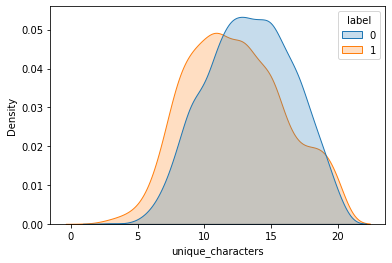

In [ ]:
df['unique_characters'] = df['sequence'].apply(lambda x: len(np.unique([*x])))
sns.kdeplot(data=df, x='unique_characters', hue='label', common_norm=True, shade=True)

## Count length of sequence per protein
We also add log sequence length in case the distribution is lognormal.

Length of Sequence per Protein: The plot below shows no difference between the labeled groups. The non-AMP protein (label = 0) is mostly identical to AMP protein group (label = 1) as shown.


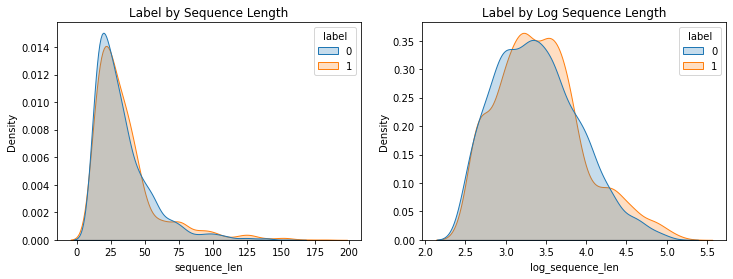

In [ ]:
_fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['sequence_len'] = df['sequence'].str.len()
df['log_sequence_len'] = np.log(1 + df['sequence_len'])
sns.kdeplot(data=df, x='sequence_len', hue='label', shade=True, ax=axes[0]).set_title('Label by Sequence Length')
sns.kdeplot(data=df, x='log_sequence_len', hue='label', shade=True, ax=axes[1]).set_title('Label by Log Sequence Length')
pass

In [ ]:
df['unique_characters'] = df['sequence'].apply(lambda x: len(np.unique([*x])))
df.describe()

,label,sequence_len,unique_characters,log_sequence_len
count,4042.000000,4042.000000,4042.000000,4042.000000
mean,0.500000,34.002474,12.849085,3.402932
std,0.500062,22.327532,3.473303,0.529313
min,0.000000,11.000000,2.000000,2.484907
25%,0.000000,19.000000,10.000000,2.995732
50%,0.500000,28.000000,13.000000,3.367296
75%,1.000000,41.000000,15.000000,3.737670
max,1.000000,183.000000,20.000000,5.214936


To understand the distribution of the amino acids *in* each protein, we counted the unique amino acids in a protein. Although the length of the sequence of protein varied from a minimum of 11 to a maximum of 183, the number of *unique* amino acids in them varied from 2 – 20.

## Amino acid count
Again, this is may be a lognormal distribution so we show the logs as well.

In [ ]:
all_chars = sorted(set(df[['sequence']].applymap(list).sequence.apply(pd.Series).stack().unique()))
f'There are {len(all_chars)} unique amino acid characters in data.'

'There are 21 unique amino acid characters in data.'

Amino Acid Count:

In the following set of plots, we examine the density of the counts and check if there are any differences by the labeled groups AMP and non-AMP. From the plots, we can see that the C count, D count, and E count plots show differences. There are a few others that show other minor differences as well. The plots are repeated using Log counts (taking logs makes the distribution better, i.e., it reduces extremes and the effect of outliers). The distributions look better and the differences are easier to spot, but overall the conclusions are same.


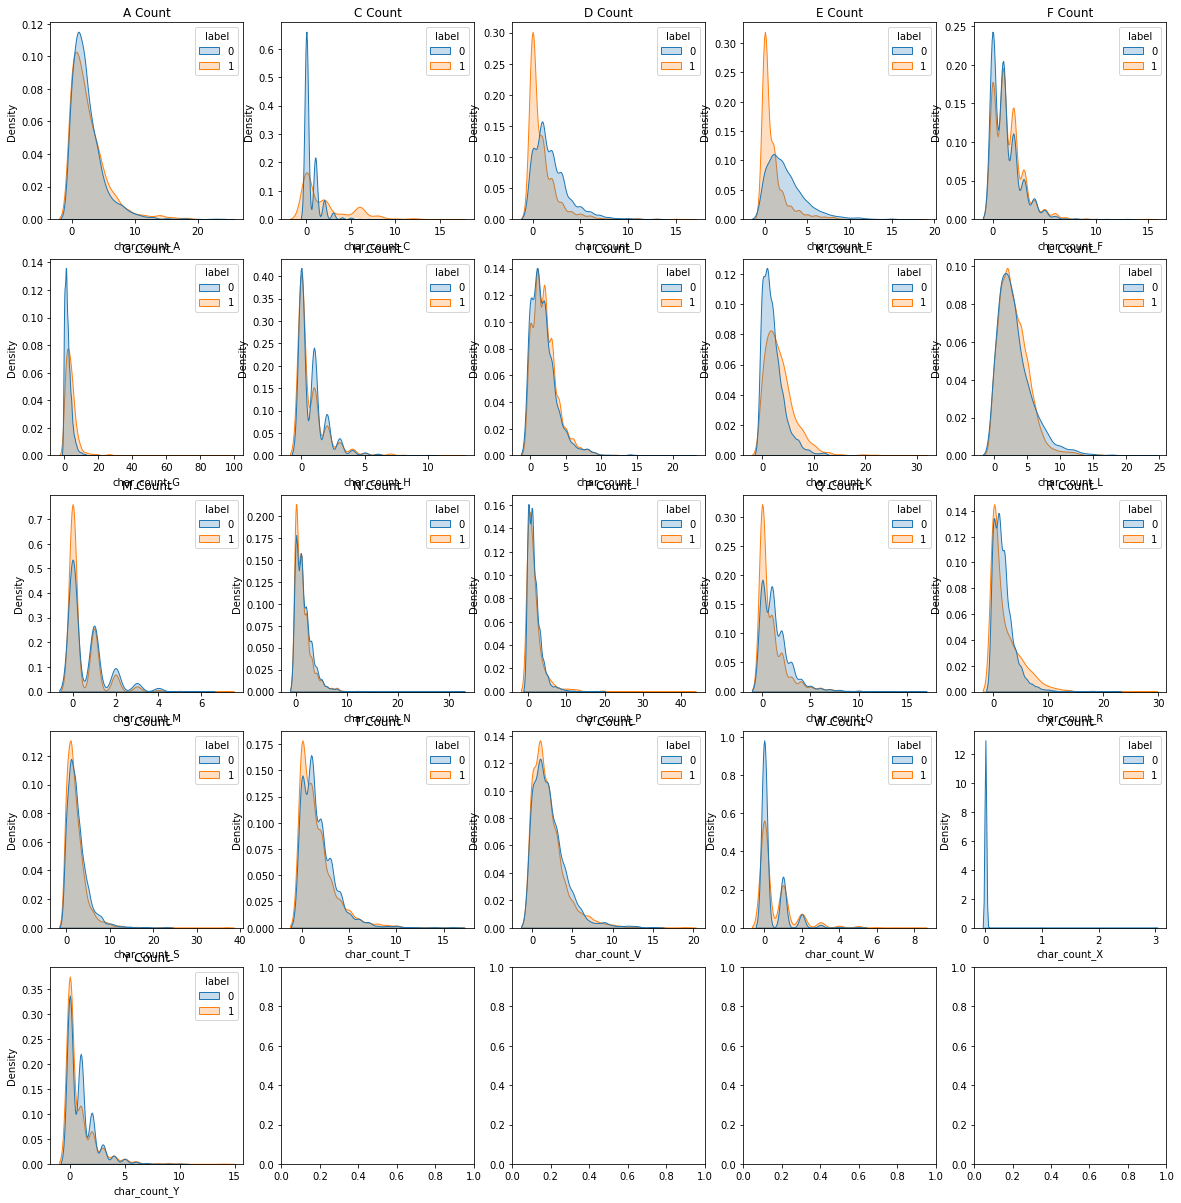

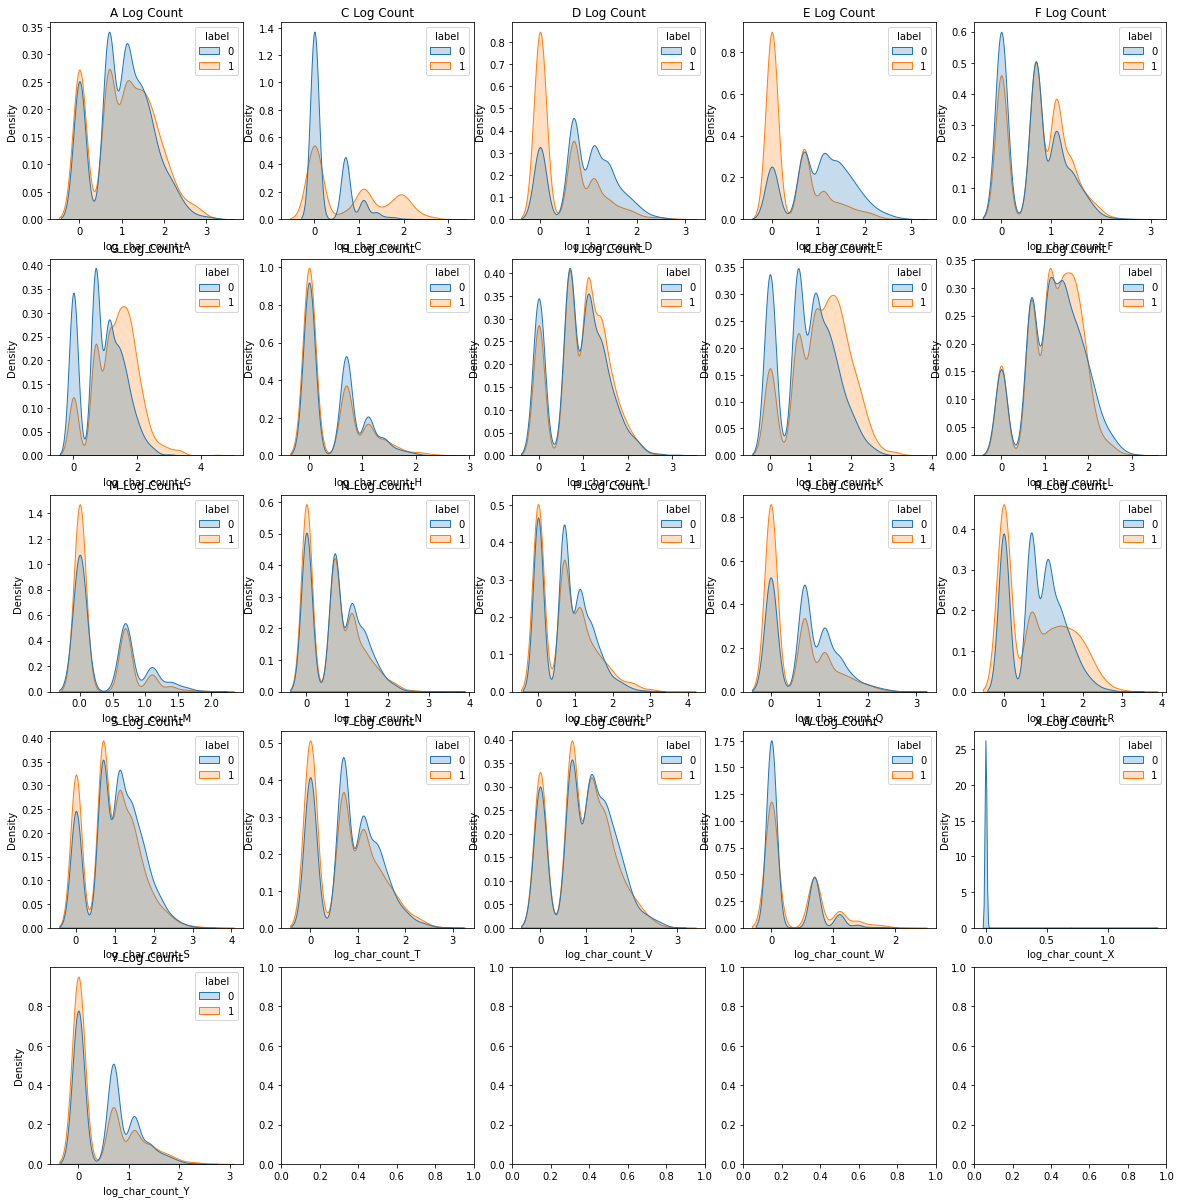

In [ ]:
for char in sorted(all_chars):
    df[f'char_count_{char}'] = df['sequence'].str.count(char)
    df[f'log_char_count_{char}'] = np.log(1 + df[f'char_count_{char}'])
fig, axs = plt.subplots(math.ceil(len(all_chars) / 5), 5, figsize=(20, max(20, len(all_chars))))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(all_chars):
    sns.kdeplot(data=df, x=f'char_count_{char}', hue='label', warn_singular=False, shade=True, ax=axs[i]).set_title(f'{char} Count')
plt.show()
fig, axs = plt.subplots(math.ceil(len(all_chars) / 5), 5, figsize=(20, max(20, len(all_chars))))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(all_chars):
    sns.kdeplot(data=df, x=f'log_char_count_{char}', hue='label', warn_singular=False, shade=True, ax=axs[i]).set_title(f'{char} Log Count')
pass

Percent of AMP by Sequence Length:

In this set of plots, we checked the occurrence of AMP proteins by amino acid to examine if any specific amino acid had progressively higher frequency of AMP with increasing presence. For example, in the plot (Percent of AMP by W count), we see in the group where there are zero ‘W’ amino acids, 0.4% are AMPs. But the percentage steadily increases and in the group of proteins where there are eight ‘W’ amino acids, 1.0% are AMPs. Many plots show differences in percentage of AMP, but it is hard to interpret these as it’s difficult to know if individual amino acids within proteins are predictive. They could be but we do not have the domain area knowledge.


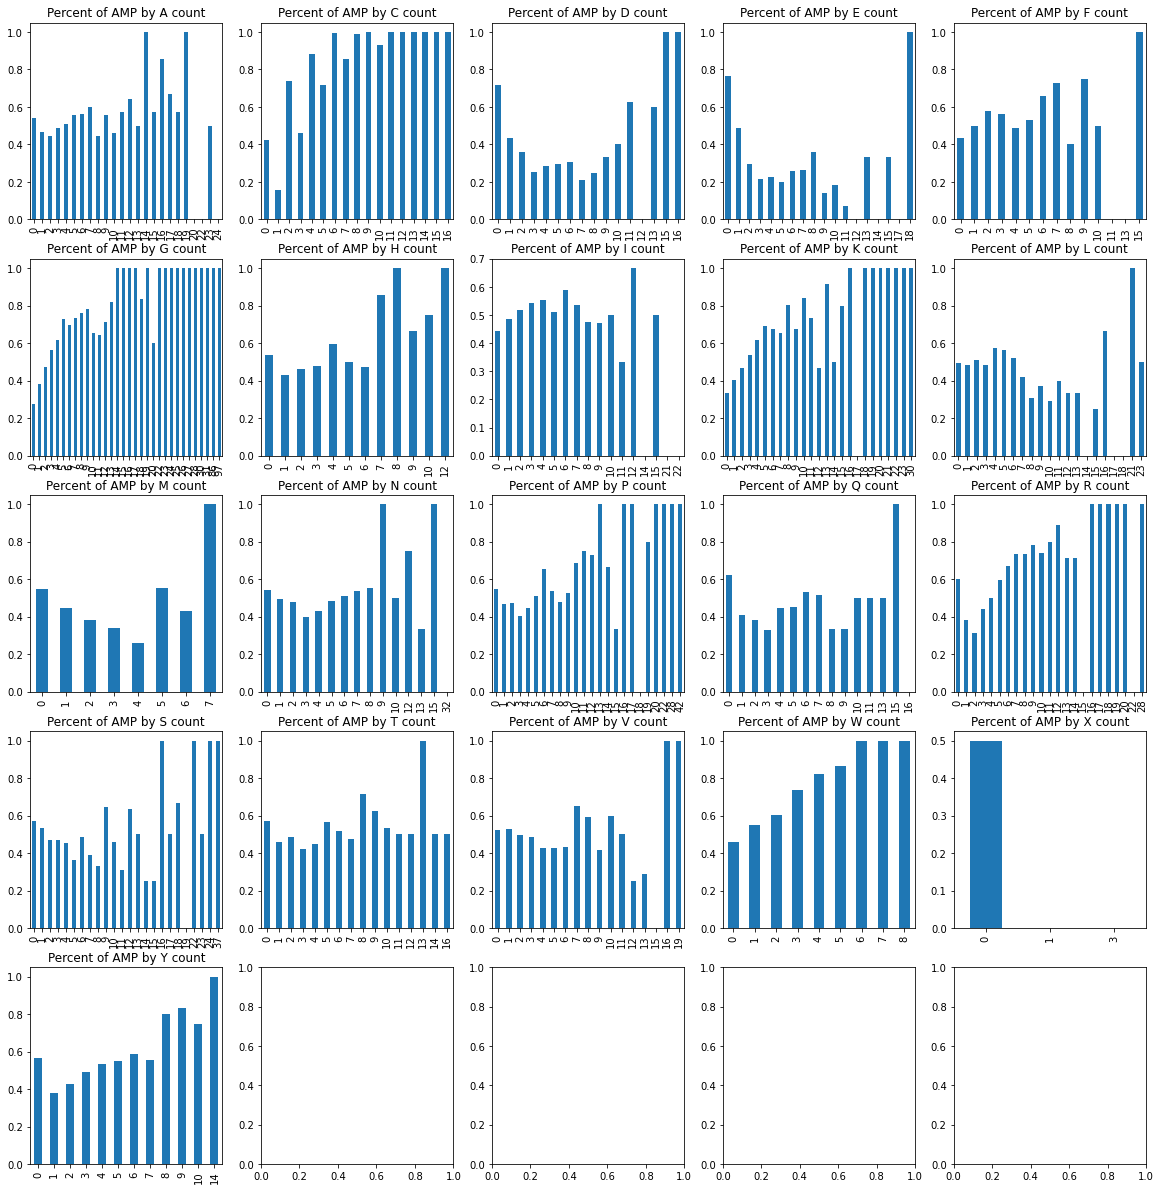

In [ ]:
# Percent of AMP by sequence length
fig, axs = plt.subplots(math.ceil(len(all_chars) / 5), 5, figsize=(20, max(20, len(all_chars))))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(sorted(all_chars)):
    df.groupby(f'char_count_{char}')['label'].mean().plot.bar(ax=axs[i], title=f'Percent of {name} by {char} count', xlabel='')

## Show the top and bottom most correlated columns

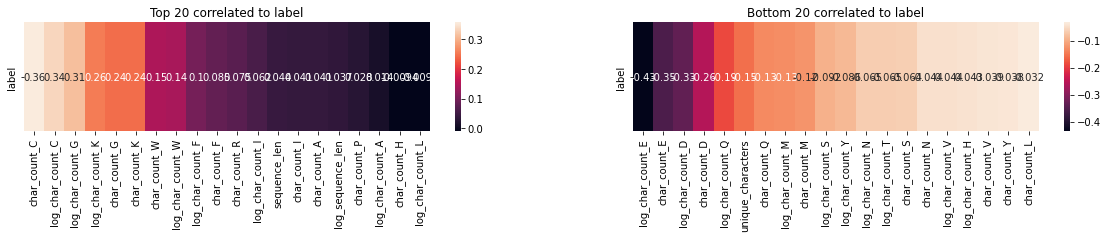

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 2))
max_columns = 20
corr_df = df.corr().loc[['label'], :]
top_corr_df = corr_df[list(reversed(corr_df.columns[corr_df.loc[corr_df.last_valid_index()].argsort()]))[1:max_columns+1]]
sns.heatmap(top_corr_df, annot=True, ax=ax[0]).set_title(f'Top {max_columns} correlated to label')
bot_corr_df = corr_df[list(corr_df.columns[corr_df.loc[corr_df.last_valid_index()].argsort()])[:max_columns]]
sns.heatmap(bot_corr_df, annot=True, ax=ax[1]).set_title(f'Bottom {max_columns} correlated to label')
pass

The above correlations confirm what the plots showed above.

In [ ]:
#calculate point-biserial correlation
stats.pointbiserialr(df.sequence_len, df.label)

PointbiserialrResult(correlation=0.043596443175666286, pvalue=0.0055682270628302334)

Unlike the ACP protein, here the correlation is not strong between the protein sequence length and AMP. This was clear from the plots above. 

# DNABPs Data (DNA Binding Proteins)

## Load your data below:
Data must have 'sequence' column of uppercase letters and 'label' column (int). 
`name` is a variable corresponding to what your label does.

Exploratory Data Analysis on the DNA-Binding protein TRAIN dataset:

The dataset is labeled and it is divided into DNA-binding and non-DNA-binding proteins. It’s a limited dataset, with no features except one, and it is a large dataset with 14189 rows and four columns: 
Column 1: Code
Column 2: Protein sequence as represented by the alphabets of 21 amino acids
Column 3: DNA-binding/non-DNA-binding – a binary var that takes on value 0 or 1.
Column 4: The link to the origin of the data.

We found 24 unique amino acids in the dataset.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dna_binding/train.csv').rename(columns={'SequenceID': 'sequence'}) # Replace me with the data you want
name = 'DNA Binding'

In [ ]:
df.describe()

,label
count,14189.000000
mean,0.502431
std,0.500012
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


These are real CSVs, not fasta, unlike most protein data.

In [ ]:
df['label'].value_counts()

1    7129
0    7060
Name: label, dtype: int64

In [ ]:
df.describe()

,label,sequence_len
count,14189.000000,14189.000000
mean,0.502431,425.287335
std,0.500012,373.224891
min,0.000000,47.000000
25%,0.000000,189.000000
50%,1.000000,327.000000
75%,1.000000,520.000000
max,1.000000,4911.000000


In [ ]:
df.head()

,code,sequence,label,origin
0,Q6A8L0,MSGHSKWATTKHKKAAIDAKRGKLFARLIKNIEVAARLGGGDPSGN...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
1,Q7V7T9,MIGWLQGQKVEAWQQGTRQGVVLACAGVGYEVQIAPRHLSEMEHGQ...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
2,Q9ZUP2,MARILRNVYSLRSSLFSSELLRRSVVGTSFQLRGFAAKAKKKSKSD...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
3,Q2JVG1,MKCPRCGKQEIRVLESRSAEGGQSVRRRRECMSCGYRFTTYERIEF...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
4,Q9K4Q3,MTKADIIEGVYEKVGFSKKESAEIVELVFDTLKETLERGDKIKISG...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...


In [ ]:
df.tail()

,code,sequence,label,origin
14184,P52610,MEEKKEKEILDVSALTGKQKAAILLVSIGSEISSKVFKYLSQEEIE...,0,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
14185,Q0S3H4,MSTIADPRDILLAPVISEKSYGLIEEGTYTFLVHPDSNKTQIKIAV...,0,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
14186,A0RQ16,MSLESFDKDIYSLVNKELERQCDHLEMIASENFTYPDVMEVMGSVL...,0,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
14187,Q16AE8,MALKSYKPTTPGQRGLVLIDRSELWKGRPVKALTEGLSKHGGRNNT...,0,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
14188,Q486Z0,MKLPIYFDYSATTPVDKRVAEKMMQYMTNDGHFGNPASRSHKFGWQ...,0,https://github.com/hfuulgb/PDB-Fusion/tree/mai...


In [ ]:
df['sequence_len'] = df['sequence'].str.len()
print(df.sequence_len)

0        264
1        225
2        430
3        200
4        129
        ... 
14184    344
14185    101
14186    414
14187    280
14188    404
Name: sequence_len, Length: 14189, dtype: int64


This dataset has MUCH longer protein sequences than the other two datasets. Once again, though the length of the sequence of protein varied from a minimum of 47 to a maximum of 4911, the number of unique amino acids varied from 7 – 21. So there are proteins that are made up of nearly all the amino acids.

### Count Unique Characters per protein

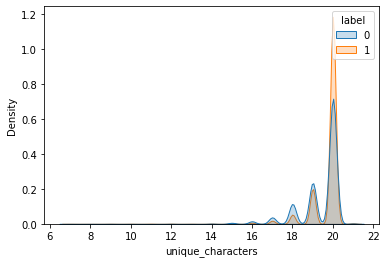

In [ ]:
df['unique_characters'] = df['sequence'].apply(lambda x: len(np.unique([*x])))
sns.kdeplot(data=df, x='unique_characters', hue='label', common_norm=True, shade=True)

## Count length of sequence per protein
We also add log sequence length in case the distribution is lognormal.

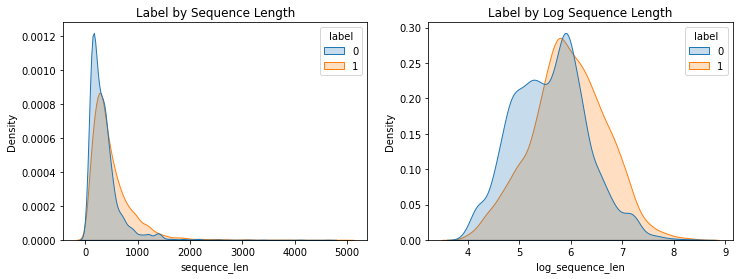

In [ ]:
_fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df['sequence_len'] = df['sequence'].str.len()
df['log_sequence_len'] = np.log(1 + df['sequence_len'])
sns.kdeplot(data=df, x='sequence_len', hue='label', shade=True, ax=axes[0]).set_title('Label by Sequence Length')
sns.kdeplot(data=df, x='log_sequence_len', hue='label', shade=True, ax=axes[1]).set_title('Label by Log Sequence Length')
pass

The plot shows some difference between the protein length of labeled groups. The non-DNA-binding protein (label = 0) is mostly identical to DNA-binding protein group (label = 1) as shown above (except for a slightly higher peak). The DNA-binding protein group is shifted right.

## Amino acid count
Again, this is may be a lognormal distribution so we show the logs as well.

In [ ]:
all_chars = sorted(set(df[['sequence']].applymap(list).sequence.apply(pd.Series).stack().unique()))
f'There are {len(all_chars)} unique amino acid characters in data.'

'There are 24 unique amino acid characters in data.'

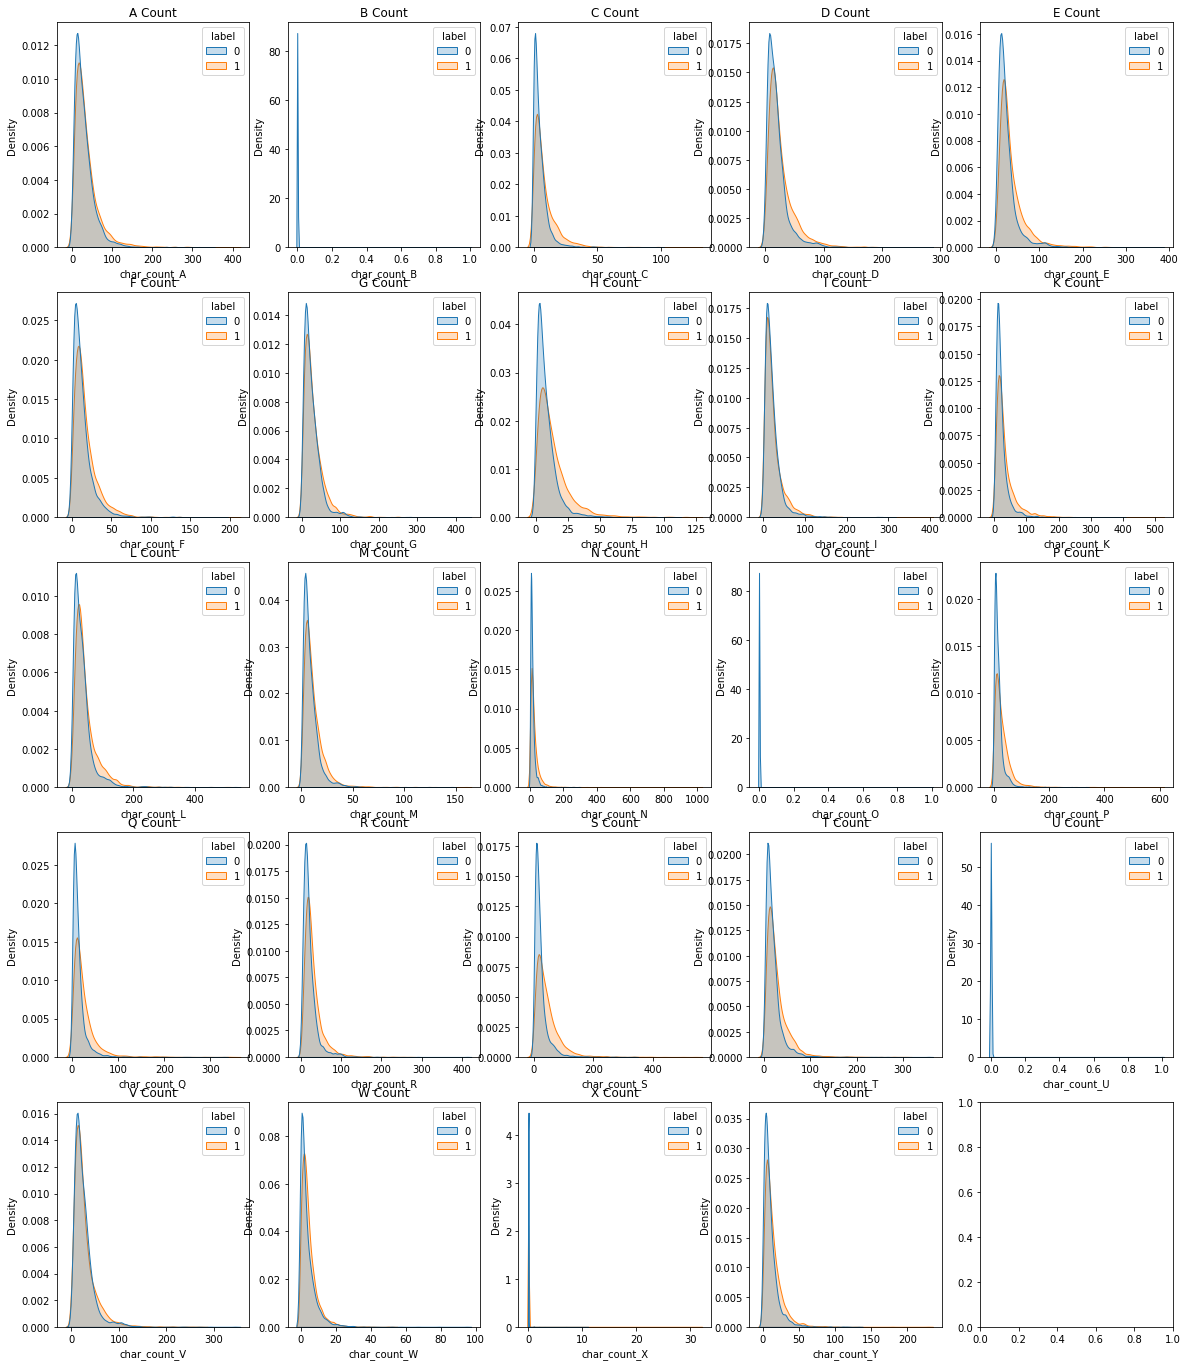

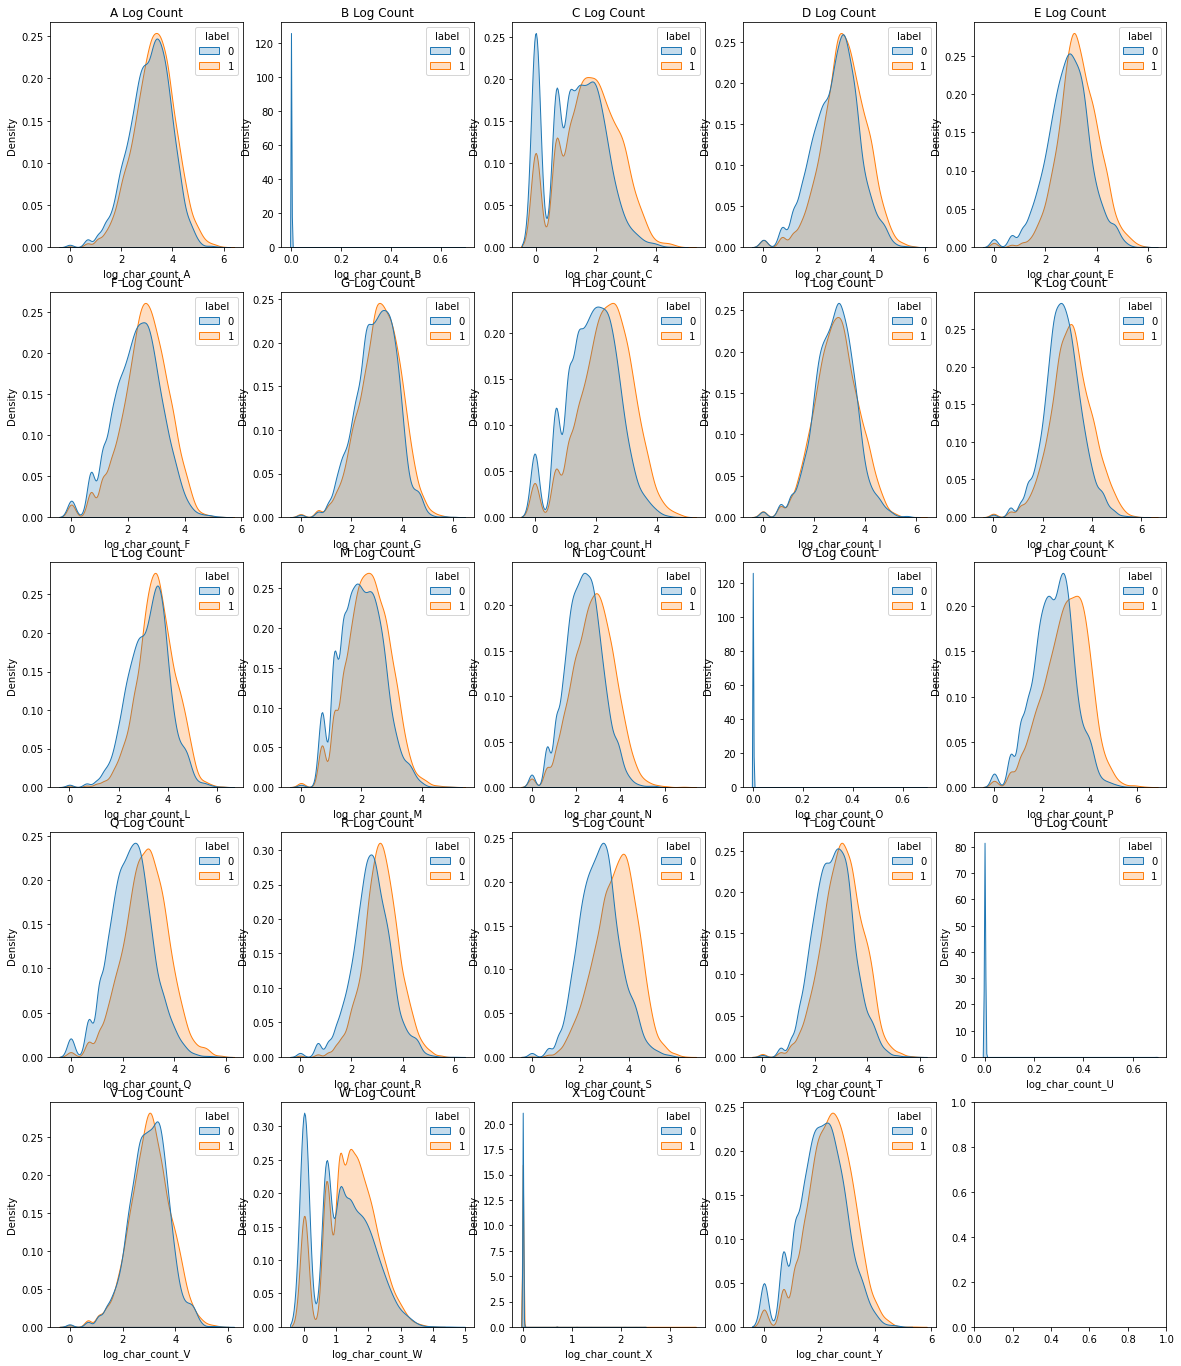

In [ ]:
for char in sorted(all_chars):
    df[f'char_count_{char}'] = df['sequence'].str.count(char)
    df[f'log_char_count_{char}'] = np.log(1 + df[f'char_count_{char}'])
fig, axs = plt.subplots(math.ceil(len(all_chars) / 5), 5, figsize=(20, max(20, len(all_chars))))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(all_chars):
    sns.kdeplot(data=df, x=f'char_count_{char}', hue='label', warn_singular=False, shade=True, ax=axs[i]).set_title(f'{char} Count')
plt.show()
fig, axs = plt.subplots(math.ceil(len(all_chars) / 5), 5, figsize=(20, max(20, len(all_chars))))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(all_chars):
    sns.kdeplot(data=df, x=f'log_char_count_{char}', hue='label', warn_singular=False, shade=True, ax=axs[i]).set_title(f'{char} Log Count')
pass

Amino Acid Count:

In the above set of plots, we examine the density of the counts and if there are any differences by the two labeled groups DNA and non-DNA. From the plots, the B count, O count, U count, and X count show differences. The plots are repeated using Log counts (taking logs makes the distribution better – it reduces extremes and reduces the effect of outliers). The differences are clearer, but conclusions are the same.


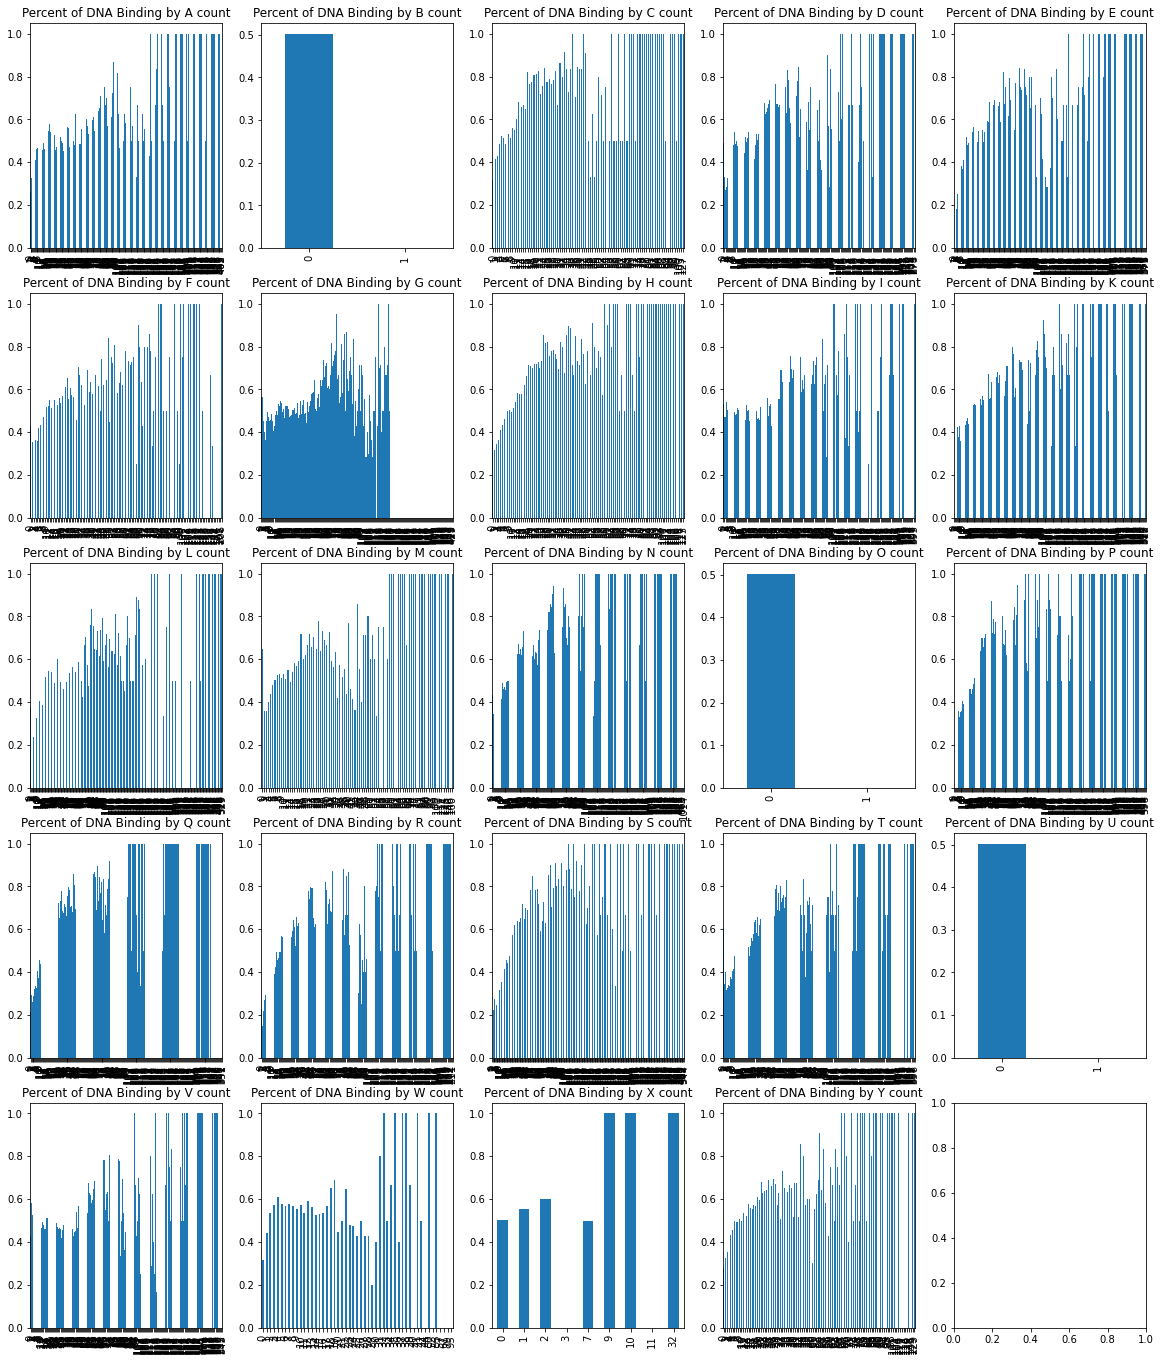

In [ ]:
# Percent of ACP by sequence length
fig, axs = plt.subplots(math.ceil(len(all_chars) / 5), 5, figsize=(20, max(20, len(all_chars))))
axs = axs.ravel()  # To deal with rows of plots
for i, char in enumerate(sorted(all_chars)):
    df.groupby(f'char_count_{char}')['label'].mean().plot.bar(ax=axs[i], title=f'Percent of {name} by {char} count', xlabel='')

Percent of DNA by Sequence Length:

In this set of plots, we checked the occurrence of DNA-binding proteins by amino acid to examine if any amino acid had progressively higher frequency of DNA-binding proteins with increasing presence. For all the plots, we see the percentage of DNA-binding protein steadily increasing. Only for three amino acids (B, O, U, X) we see virtually no DNA-binding proteins. 


## Show the top and bottom most correlated columns

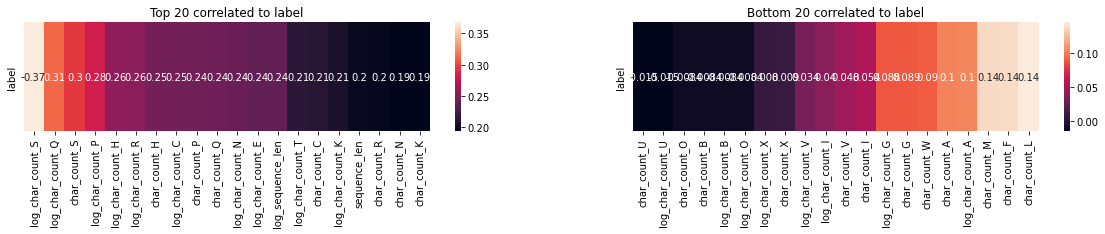

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 2))
max_columns = 20
corr_df = df.corr().loc[['label'], :]
top_corr_df = corr_df[list(reversed(corr_df.columns[corr_df.loc[corr_df.last_valid_index()].argsort()]))[1:max_columns+1]]
sns.heatmap(top_corr_df, annot=True, ax=ax[0]).set_title(f'Top {max_columns} correlated to label')
bot_corr_df = corr_df[list(corr_df.columns[corr_df.loc[corr_df.last_valid_index()].argsort()])[:max_columns]]
sns.heatmap(bot_corr_df, annot=True, ax=ax[1]).set_title(f'Bottom {max_columns} correlated to label')
pass

The graphs depict the label on othe y axis and the correlations

Once more, the correlations produced in the heatmap mirror the plots shown above.

In [ ]:
#calculate point-biserial correlation
stats.pointbiserialr(df.sequence_len, df.label)


PointbiserialrResult(correlation=0.19790714703535184, pvalue=2.7603611650473694e-125)

There is a slight positive correlation between protein length and DNA-binding.